# Fashion MNIST

[Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist) can be used as drop-in replacement for the original MNIST dataset (10 categories of handwritten digits). It shares the same image size (28x28) and structure of training (60,000) and testing (10,000) splits. The class labels are:

| Label|	Description|
|-|-|
|0|	T-shirt/top|
|1|	Trouser|
|2|	Pullover|
|3|	Dress|
|4|	Coat|
|5|	Sandal|
|6|	Shirt|
|7|	Sneaker|
|8|	Bag|
|9|	Ankle boot|

**Example**

<img src="https://github.com/zalandoresearch/fashion-mnist/raw/master/doc/img/fashion-mnist-sprite.png" width="50%"/>

In this notebook, I want to train a classical ML model (no deep learning) to reach the highest accruracy score.

**My goal is to reach Accuracy Score on the given test set: >89%**

## Get fashion MNIST data

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

print('Training data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Training data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


# Display images

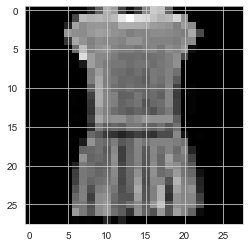

In [ ]:
plt.imshow(X_train[3], cmap='gray')

In [ ]:
def plot_images(images, labels=None):
  '''Plot images with their labels. Ten each row'''
  plt.figure(figsize=(20,20))
  columns = 10
  for i, image in enumerate(images):
    ax = plt.subplot(len(images) / columns + 1, columns, i + 1)
    if not labels is None:
      ax.set_title(f"{labels[i]}", fontsize=16)
    plt.axis('off')
    plt.subplots_adjust(bottom=0.1)
    plt.imshow(image, cmap='gray')

In [ ]:
def get_samples(n_samples, X, y=None):
  '''Get n_samples randomly'''
  samples_index = np.random.choice(np.arange(len(X)), n_samples, replace=False)
  if not y is None:
    return X[samples_index], y[samples_index]
  return X[samples_index]

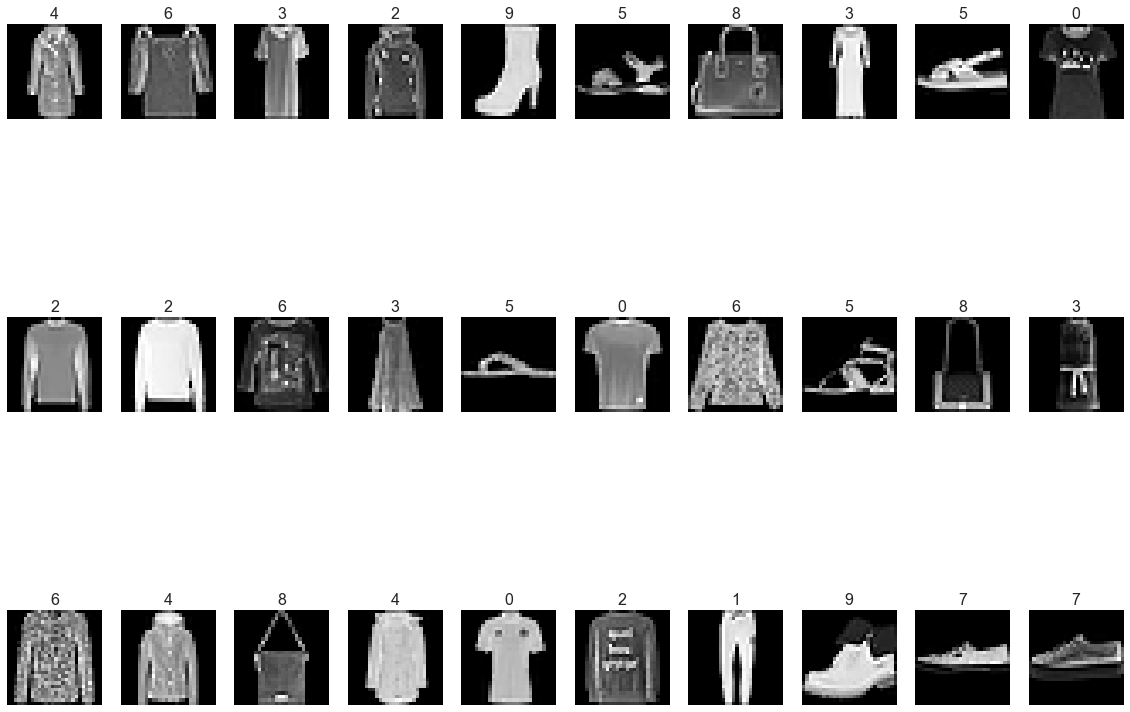

In [ ]:
images, labels = get_samples(30, X_train, y_train)
plot_images(images, labels)

# Split Train set and Test set

These are numpy arrays:
- X_train 
- y_train 
- X_test 
- y_test

In [ ]:
print('Trainingm data:', X_train.shape, y_train.shape)
print('Test data:', X_test.shape, y_test.shape)

Trainingm data: (60000, 28, 28) (60000,)
Test data: (10000, 28, 28) (10000,)


In [ ]:
X_train_flat = X_train.reshape((-1, 784))
X_test_flat = X_test.reshape((-1, 784))
y_train_flat = y_train
y_test_flat = y_test

print('Training data', X_train_flat.shape)
print('Test data', X_test_flat.shape)
print('Training label', y_train_flat.shape)
print('Test label', y_test_flat.shape)

Training data (60000, 784)
Test data (10000, 784)
Training label (60000,)
Test label (10000,)


# Pick model

In [ ]:
n_samples = 8000
n_test_samples = 400
X_train_flat_sample, y_train_flat_sample = get_samples(n_samples, X_train_flat, y_train_flat)
X_test_flat_sample, y_test_flat_sample = get_samples(n_test_samples, X_test_flat, y_test_flat)
print(X_train_flat_sample.shape, X_test_flat_sample.shape)

(8000, 784) (400, 784)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf2 = RandomForestClassifier()
clf2.fit(X_train_flat_sample, y_train_flat_sample)
clf2.score(X_test_flat, y_test_flat)

0.8441

In [ ]:
pred = clf2.predict(X_test_flat)

In [ ]:
images, labels = get_samples(30, X_test, pred)

In [ ]:
plot_images(images, labels)

# Train model

## RandomForestClassifier

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
params = {
    'bootstrap': [False],
    # 'max_features': ['sqrt'],
    'max_depth': range(10,201,10),
    'min_samples_leaf': [1],
    'min_samples_split': np.arange(1,30,2),
    'n_estimators': [10, 20, 30, 40, 50, 60, 70 ,80, 90, 100, 200, 400, 600, 800, 1000]
}
model = RandomForestClassifier()

rd_search = RandomizedSearchCV(model, param_distributions=params, n_iter=150, cv=3, n_jobs=-1, verbose=3)
rd_search.fit(X_train_flat_sample, y_train_flat_sample)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': range(10, 201, 10),
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100, 200,
                                                         400, 600, 800, 1000]},
                   verbose=3)

In [ ]:
rd_search.best_score_

0.8582502299740664

In [ ]:
rd_search.best_params_

{'n_estimators': 600,
 'min_samples_split': 3,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 90,
 'bootstrap': False}

In [ ]:
params = {
    'bootstrap':[False],
    # 'max_features':['sqrt'],
    'max_depth': range(80,100,2),
    'min_samples_leaf': [1],
    'min_samples_split': range(1,11),
    'n_estimators': range(500,701,10)
}
model = RandomForestClassifier()

rd_search = RandomizedSearchCV(model, param_distributions=params, n_iter=150, cv=3, n_jobs=-1, verbose=2)
rd_search.fit(X_train_flat_sample, y_train_flat_sample)

Fitting 3 folds for each of 150 candidates, totalling 450 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=150,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [False],
                                        'max_depth': range(80, 100, 2),
                                        'max_features': ['sqrt'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': range(1, 11),
                                        'n_estimators': range(500, 701, 10)},
                   verbose=2)

In [ ]:
rd_search.best_score_

0.8590006988061226

In [ ]:
rd_search.best_params_

{'n_estimators': 630,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 88,
 'bootstrap': False}

In [ ]:
params = {
    'bootstrap':[False],
    'max_features':['sqrt'],
    'max_depth': [87,88,89],
    'min_samples_leaf': [1],
    'min_samples_split': [1,2,3],
    'n_estimators': range(626,637,2)
}
model = RandomForestClassifier()

gr_search = GridSearchCV(model, param_grid=params, cv=3, n_jobs=-1, verbose=2)
gr_search.fit(X_train_flat_sample, y_train_flat_sample)

Fitting 3 folds for each of 54 candidates, totalling 162 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [False], 'max_depth': [87, 88, 89],
                         'max_features': ['sqrt'], 'min_samples_leaf': [1],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': range(626, 637, 2)},
             verbose=2)

In [ ]:
gr_search.best_score_

0.8588755269057233

In [ ]:
gr_search.best_params_

{'bootstrap': False,
 'max_depth': 87,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 628}

In [ ]:
best_RF = gr_search.best_estimator_

In [ ]:
best_RF.fit(X_train_flat, y_train_flat)

RandomForestClassifier(bootstrap=False, max_depth=87, max_features='sqrt',
                       min_samples_split=3, n_estimators=628)

In [ ]:
best_RF.score(X_test_flat, y_test_flat)

0.8838

## XGBoost

In [ ]:
n_samples = 3000
n_test_samples = 400
X_train_flat_sample, y_train_flat_sample = get_samples(n_samples, X_train_flat, y_train_flat)
X_test_flat_sample, y_test_flat_sample = get_samples(n_test_samples, X_test_flat, y_test_flat)
print(X_train_flat_sample.shape, X_test_flat_sample.shape)

(3000, 784) (400, 784)


In [ ]:

# xgb.fit(X_train_flat_sample, y_train_flat_sample)
# xgb.score(X_test_flat_sample, y_test_flat_sample)

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from xgboost import XGBClassifier

xgb = XGBClassifier(gpu_id=0, tree_method='gpu_hist')
params = {
    'learning_rate':np.arange(0.1,1,0.1),
    'min_child_weight': range(1,10,2),
    'max_depth': range(1,10,2),
    'gamma': np.arange(0,0.5,0.1),
    'subsample': np.arange(0.5,0.9,0.1),
    'colsample_bytree': np.arange(0.5,0.9,0.1),
    'n_estimators': range(100,1001,100)
}

rd_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=100, cv=3, n_jobs=-1, verbose=10)
rd_search.fit(X_train_flat_sample, y_train_flat_sample)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[23:02:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=0, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100, n_j...
                                           validate_parameters=None,
                                           verbosity=None),
                   n_iter=100, n_jobs=-1,
         

In [ ]:
xgb.get_params

<bound method XGBModel.get_params of XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=0, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method='gpu_hist',
              validate_parameters=None, verbosity=None)>

In [ ]:
rd_search.best_score_

0.8386666666666667

In [ ]:
rd_search.best_params_

{'subsample': 0.6,
 'n_estimators': 800,
 'min_child_weight': 7,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.6}

In [ ]:
best_xgb = rd_search.best_estimator_
best_xgb

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=800, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [ ]:
best_xgb.fit(X_train_flat, y_train_flat)

[23:05:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=0,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=5,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=800, n_jobs=12, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=0.6,
              tree_method='gpu_hist', validate_parameters=1, verbosity=None)

In [ ]:
best_xgb.score(X_test_flat, y_test_flat)

0.9062

In [ ]:
y_test_pred = best_xgb.predict(X_test_flat)

# Report

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

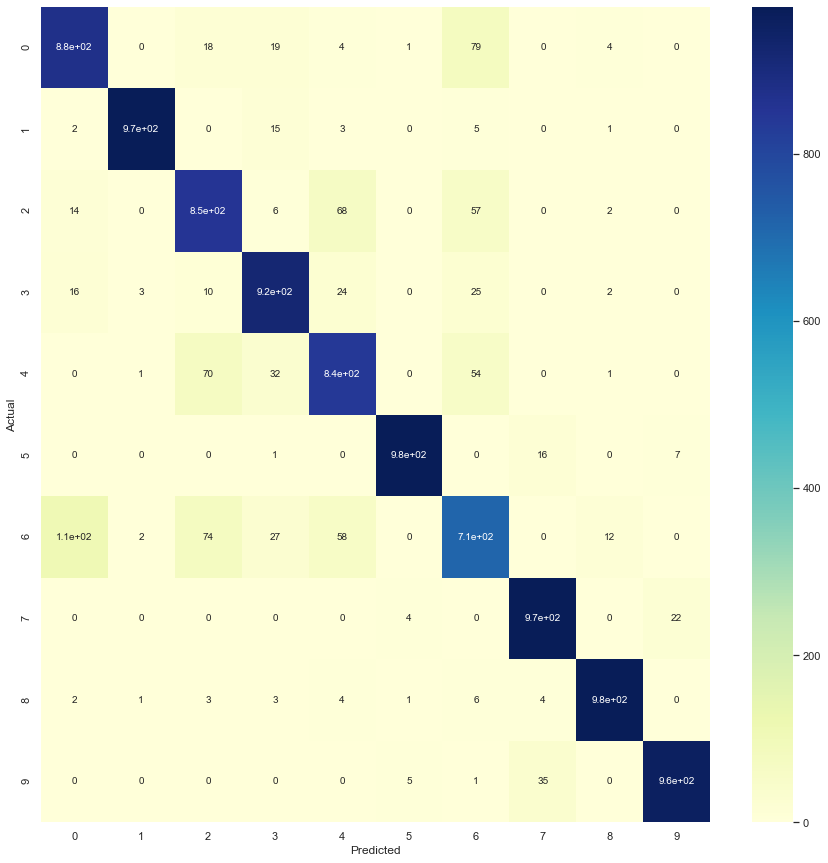

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
data = confusion_matrix(y_test_flat, y_test_pred)
df_cm = pd.DataFrame(data, columns=np.unique([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 
                     index = np.unique([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]))

df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (15,15))
sns.set(font_scale=1)
sns.heatmap(df_cm, cmap="YlGnBu", annot=True,annot_kws={"size": 10})


In [ ]:
result0 = pd.DataFrame(y_test_flat, columns=['Labels'])
result1 = pd.DataFrame(y_test_pred, columns=['Predictions'])
total = pd.concat((result0, result1), axis=1)
index = total[total['Labels'] != total['Predictions']].sample(50).index
img = X_test[index, :, :]
predict=result1.loc[index].values

In [ ]:
Label	Description
0	T-shirt/top
1	Trouser
2	Pullover
3	Dress
4	Coat
5	Sandal
6	Shirt
7	Sneaker
8	Bag
9	Ankle boot

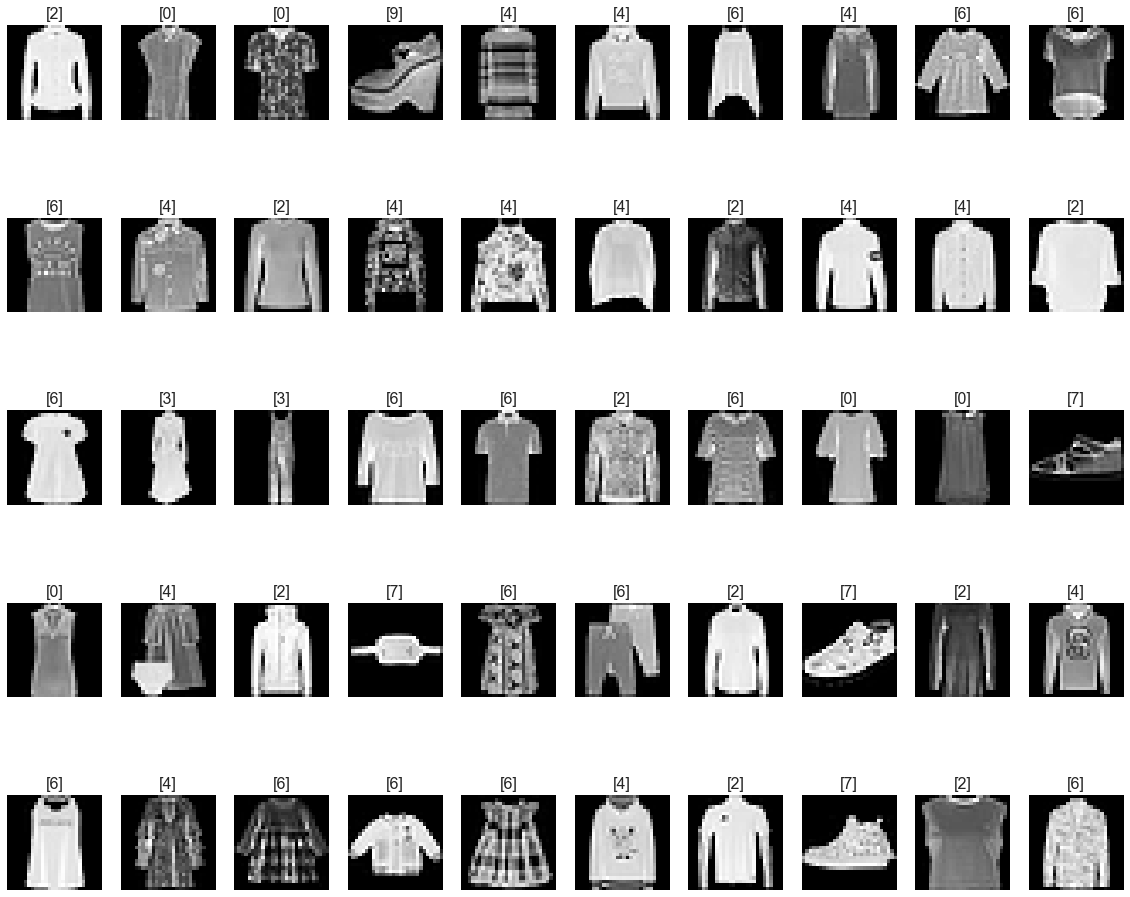

In [ ]:
plot_images(img, predict)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test_flat, y_test_pred))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1000
           1       0.99      0.97      0.98      1000
           2       0.83      0.85      0.84      1000
           3       0.90      0.92      0.91      1000
           4       0.84      0.84      0.84      1000
           5       0.99      0.98      0.98      1000
           6       0.76      0.71      0.74      1000
           7       0.95      0.97      0.96      1000
           8       0.98      0.98      0.98      1000
           9       0.97      0.96      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000

